# Concept Evaluation

This notebook is intended to evaluate some image processing concepts e.g. in order to optimize star. recognition.

In [24]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from astropy.visualization import astropy_mpl_style

In [25]:
#test_image = '2019-05-17-2209_7-CapObj_0000.jpg'
#test_image = '2019-12-04-2032_4-M27_0045.tiff'
test_image = '2019-08-22-2058_1-M13_0316.tiff'
#test_image = 'ASICAP_2019-03-29_22_14_34_313.tiff'
im = cv2.imread(test_image, cv2.IMREAD_UNCHANGED)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

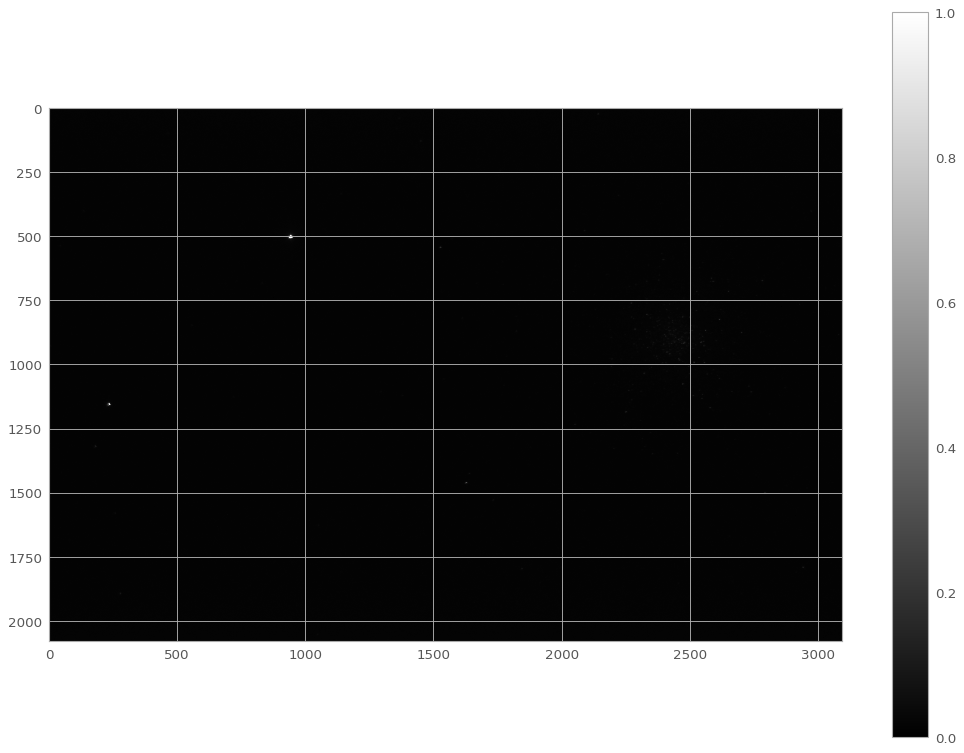

In [26]:
plt.style.use(astropy_mpl_style)
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
im = (im-np.min(im))/np.max(im)
plt.imshow(im/np.max(im),cmap='gray')
plt.colorbar()

In [27]:
mean = cv2.GaussianBlur(im,(255,255),0)
detect = cv2.GaussianBlur(im,(5,5),0)

In [28]:
blob=(detect > (2*mean+0*np.sqrt(mean)))
blob = np.uint8(blob)*255

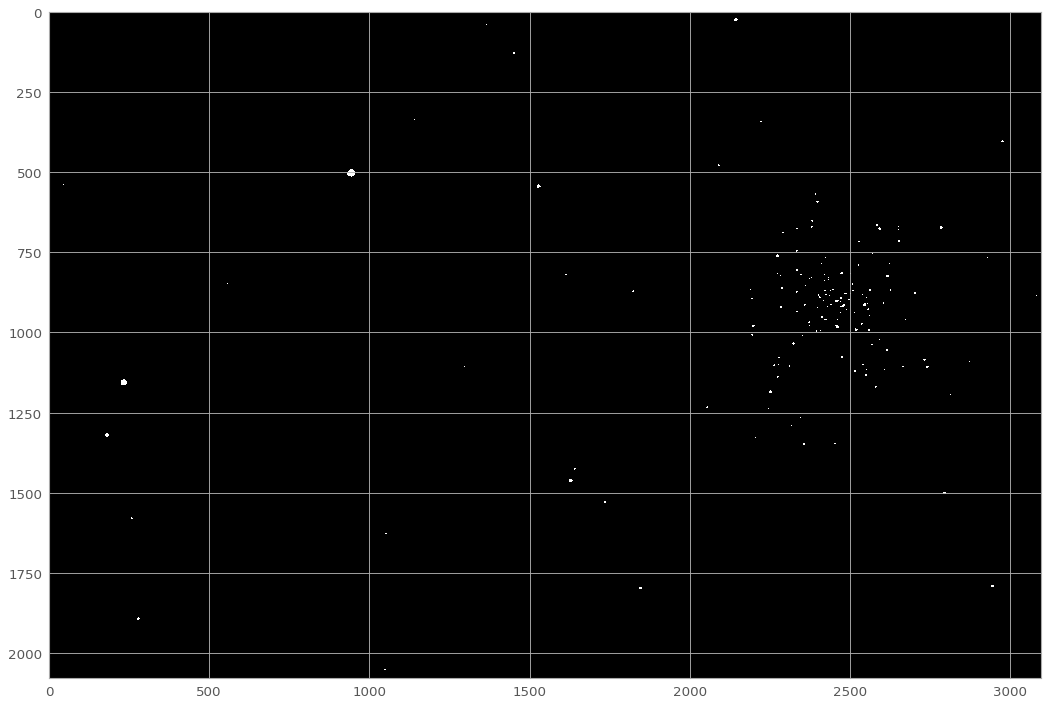

In [29]:
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(blob)

In [30]:
params = cv2.SimpleBlobDetector_Params()

In [31]:
params.minArea = 15
params.maxArea =10000
params.blobColor=255
params.thresholdStep=1
params.minThreshold=0
params.maxThreshold=255
params.minRepeatability=2
params.filterByConvexity=False

In [32]:
blob_detector=cv2.SimpleBlobDetector_create(params)

In [33]:
key_points = blob_detector.detect(blob)

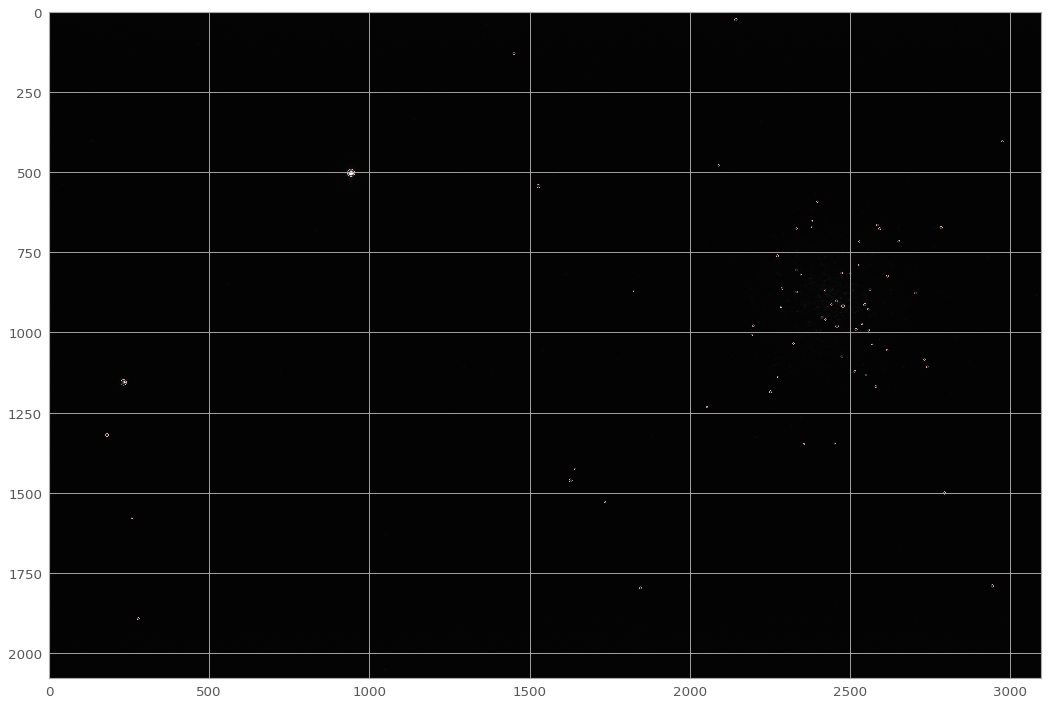

In [34]:
im_with_keypoints = cv2.drawKeypoints(
                np.uint8(im/im.max()*255),
                key_points,
                np.array([]),
                (255,200,200),
                cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(im_with_keypoints)

In [12]:
[[kp.pt[0], kp.pt[0], kp.size] for kp in key_points]

[[277.8798522949219, 277.8798522949219, 7.602420330047607],
 [1843.4788818359375, 1843.4788818359375, 6.590672969818115],
 [2940.701416015625, 2940.701416015625, 8.236808776855469],
 [258.1111145019531, 258.1111145019531, 4.692133903503418],
 [1732.3333740234375, 1732.3333740234375, 5.916157245635986],
 [2791.2109375, 2791.2109375, 8.449831008911133],
 [1626.126953125, 1626.126953125, 11.180522918701172],
 [1638.464599609375, 1638.464599609375, 4.9294586181640625],
 [2352.86669921875, 2352.86669921875, 5.063126564025879],
 [2450.155517578125, 2450.155517578125, 4.341928958892822],
 [180.40081787109375, 180.40081787109375, 10.21860122680664],
 [2051.09521484375, 2051.09521484375, 5.481762409210205],
 [2249.178955078125, 2249.178955078125, 7.789097309112549],
 [2577.6171875, 2577.6171875, 7.306699752807617],
 [232.42953491210938, 232.42953491210938, 17.589128494262695],
 [2271.588134765625, 2271.588134765625, 4.849893093109131],
 [2546.517822265625, 2546.517822265625, 5.843407154083252],

In [17]:
key_points[0].pt

(277.8798522949219, 1894.286865234375)

In [35]:
import astropy.units as u
qfrom astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [37]:
?Gaia.query_object_async

In [1]:
from astroquery.mast import Mast, Observations
from astropy.visualization import make_lupton_rgb, ImageNormalize
import matplotlib.pyplot as plt
import reproject

result = Observations.query_object('M83')
selected_bands = result[(result['obs_collection'] == 'HST') &
                        (result['instrument_name'] == 'WFC3/UVIS') &
                        ((result['filters'] == 'F657N') |
                         (result['filters'] == 'F487N') |
                         (result['filters'] == 'F336W')) &
                        (result['target_name'] == 'MESSIER-083')]
prodlist = Observations.get_product_list(selected_bands)
filtered_prodlist = Observations.filter_products(prodlist)

downloaded = Observations.download_products(filtered_prodlist)

blue = fits.open(downloaded['Local Path'][2])
red = fits.open(downloaded['Local Path'][5])
green = fits.open(downloaded['Local Path'][8])

target_header = red['SCI'].header
green_repr, _ = reproject.reproject_interp(green['SCI'], target_header)
blue_repr, _ = reproject.reproject_interp(blue['SCI'], target_header)


rgb_img = make_lupton_rgb(ImageNormalize(vmin=0, vmax=1)(red['SCI'].data),
                          ImageNormalize(vmin=0, vmax=0.3)(green_repr),
                          ImageNormalize(vmin=0, vmax=1)(blue_repr),
                          stretch=0.1,
                          minimum=0,
                         )

plt.imshow(rgb_img, origin='lower', interpolation='none')

ModuleNotFoundError: No module named 'reproject'